In [24]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
import glob
import matplotlib.pyplot as plt
import cv2

In [2]:
base_path = "C:/Users/Lnovo/OneDrive/Desktop/IOT_poject/IIT/Eye disease/cell_images"

train = base_path + '/Train'
test = base_path + '/Test'
val = base_path + '/Val'

In [9]:
fig, ax = plt.subplots(2, 3, figsize = (12, 12))
ax = ax.ravel()

for i, var in enumerate(['train', 'val', 'test']):
    Non_Infected_set = glob.glob(base_path + "/" + var +"/Non-Infected/*.png")
    Infected_set = glob.glob(base_path + "/" + var + "/Infected/*.png")
    ax[i].imshow(plt.imread(Non_Infected_set[0]), cmap = 'gray')
    ax[i].set_title('Data: {} \n Class: Non-Infected'.format(var), fontsize = 15)
    ax[i+3].imshow(plt.imread(Infected_set[0]), cmap = 'gray')
    ax[i+3].set_title('Data: {} \n Class: Infected'.format(var), fontsize = 15)
    

In [10]:
Non_Infected_set = glob.glob(base_path + "/" + var +"/Non-Infected/*.png")
Infected_set = glob.glob(base_path + "/" + var + "/Infected/*.png")
data = pd.DataFrame(np.concatenate([[0]*len(Non_Infected_set), [1]*len(Infected_set)]), columns=["class"])
sns.countplot(data['class'],data=data)

C:\Users\Lnovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

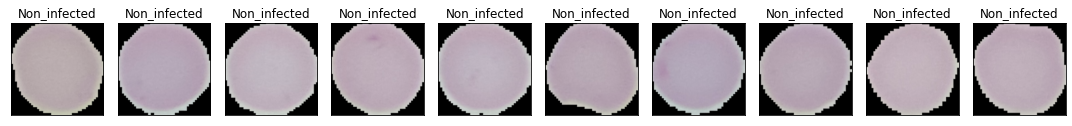

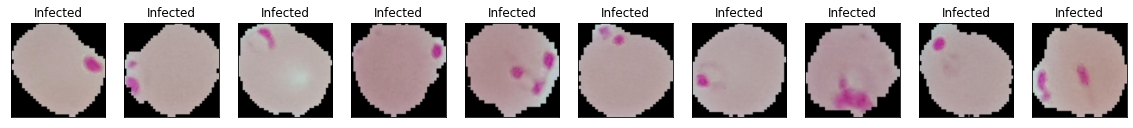

In [11]:
s = (256, 256)

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(Non_Infected_set[i])
    img = cv2.resize(img, s)
    ax.imshow(img)
    ax.set_title("Non_infected")
fig.tight_layout()    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20,20), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(Infected_set[i])
    img = cv2.resize(img, s)
    ax.imshow(img)
    ax.set_title("Infected")
plt.show()


In [13]:
gen_train = ImageDataGenerator(rescale = 1./255., zoom_range = 0.2)
gen_val = ImageDataGenerator(rescale = 1./255.)
gen_test = ImageDataGenerator(rescale = 1./255.)

train_gen = gen_train.flow_from_directory(train, batch_size = 20, class_mode = 'binary', target_size = (125, 125))
validation_gen = gen_val.flow_from_directory(val, batch_size = 20, class_mode = 'binary', target_size=(125, 125))
test_gen = gen_test.flow_from_directory(test, shuffle = False, batch_size=20, class_mode = 'binary', target_size=(125, 125))

Found 20689 images belonging to 2 classes.
Found 3528 images belonging to 2 classes.
Found 3341 images belonging to 2 classes.


In [29]:
model1 = Sequential()
model1.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(125,125,3)))
model1.add(MaxPooling2D())
model1.add(Conv2D(32, 3, padding='same', activation='relu'))
model1.add(MaxPooling2D())
model1.add(Conv2D(64, 3, padding='same', activation='relu'))
model1.add(MaxPooling2D())
model1.add(GlobalAveragePooling2D())
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(1, activation= 'sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 125, 125, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 62, 62, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
global_average_pooling2d_5 ( (None, 64)              

In [33]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

In [34]:
model1.fit(train_gen, validation_data = validation_gen, epochs = 10, batch_size=128, verbose=1,callbacks = callback )

Epoch 1/10
1035/1035 [==============================] - 178s 172ms/step - loss: 0.1640 - accuracy: 0.9458 - val_loss: 0.1489 - val_accuracy: 0.9612
Epoch 2/10
1035/1035 [==============================] - 177s 171ms/step - loss: 0.1598 - accuracy: 0.9483 - val_loss: 0.1330 - val_accuracy: 0.9668
Epoch 3/10
1035/1035 [==============================] - 200s 193ms/step - loss: 0.1609 - accuracy: 0.9492 - val_loss: 0.1502 - val_accuracy: 0.9569
Epoch 4/10
1035/1035 [==============================] - 161s 156ms/step - loss: 0.1500 - accuracy: 0.9532 - val_loss: 0.1292 - val_accuracy: 0.9657
Epoch 5/10
1035/1035 [==============================] - 187s 180ms/step - loss: 0.1457 - accuracy: 0.9545 - val_loss: 0.1369 - val_accuracy: 0.9637
Epoch 6/10
1035/1035 [==============================] - 176s 170ms/step - loss: 0.1430 - accuracy: 0.9548 - val_loss: 0.1251 - val_accuracy: 0.9691
Epoch 7/10
1035/1035 [==============================] - 189s 182ms/step - loss: 0.1432 - accuracy: 0.9536 - val_

In [54]:
model1.save_weights("95-96_malaria.h5")
model1.save("95-96_MalariaModel.h5")

In [59]:
y_pred = model1.predict(test_gen)

y_pred

array([[0.0073404 ],
       [0.05325618],
       [0.01819676],
       ...,
       [0.9927578 ],
       [0.99305725],
       [0.99138814]], dtype=float32)

In [60]:
y_pred[-1][0]

0.99138814

In [78]:
y_pred_list = []

for i in range(len(y_pred)):
    if y_pred[i]<=0.7:    
        y_pred_list.append(0.0)
    else:
        y_pred_list.append(1.0)
        
y_pred_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [80]:
NI = glob.glob(base_path + '/Test/Non-Infected/*.png')
IF = glob.glob(base_path + '/Test/Infected/*.png')

out = []

for i in range(len(IF)):
    out.append(0.0)
for i in range(len(NI)):
    out.append(1.0)
v=np.array(out)

In [81]:
matrix = confusion_matrix(out, y_pred_list, labels=[0,1])


In [82]:
cm_df = pd.DataFrame(matrix, index = ['Non-Infected','Infected'], columns = ['Non-Infected','Infected'])
plt.figure(figsize=(5,4))
ax = sns.heatmap(cm_df, annot=True, fmt="d")
ax.invert_xaxis()
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()